In [1]:
import sys
main_dir = '../'
sys.path.append(main_dir)

import numpy as np
import cmasher as cmr
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText

import opennu as on

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

In [2]:
N = 1e6
pl = np.geomspace(1e-4, 1,40)
gl = np.geomspace(1e-3,10,10)

In [3]:
j0 = []

for pi in pl:
    t2, _, _, j1, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=0, p_init=pi)
    j0.append(j1[-1])

j0 = np.array(j0)/N*4

In [ ]:
### Main plot

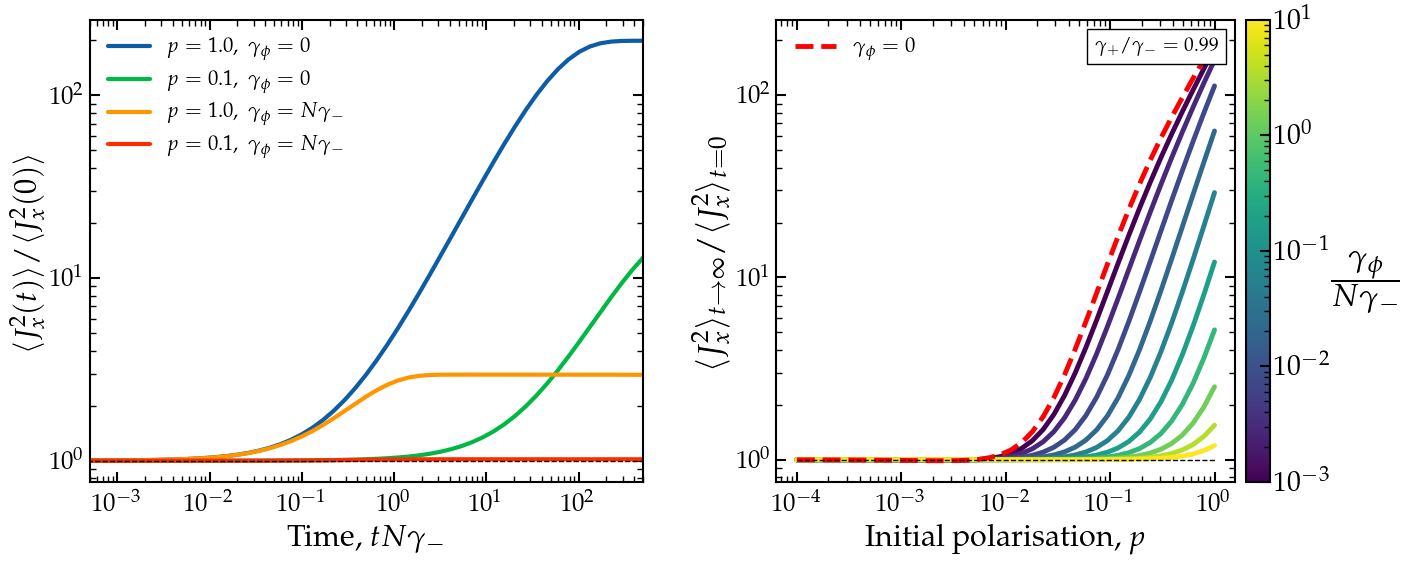

In [5]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

############################################################################################################
# First plot?
############################################################################################################


pi = 1; de= 0
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=0$'%(pi))

pi = 0.1; de= 0
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=0$'%(pi))

pi = 1; de= 1
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=N\gamma_-$'%(pi))

pi = 0.1; de= 1
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=N\gamma_-$'%(pi))


ax[0].set_xlim(5e-4, 500)
ax[0].loglog(t2, t2/t2, c='k', ls='--', lw=1)
ax[0].set_xlabel(r'Time, $tN\gamma_-$', fontsize=22)
ax[0].set_ylabel(r'$\langle J_x^2(t)\rangle/\langle J_x^2(0)\rangle$', fontsize=22)
ax[0].legend()



############################################################################################################
# Second plot
############################################################################################################


cmap = cm.viridis
norm = mcolors.LogNorm(vmin=min(gl), vmax=max(gl)) 
sm = cm.ScalarMappable(norm=norm, cmap=cmap)


for de in gl:
    jx2i = []
    jx2f = []
    for pi in pl:
        t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20)
        jx2i.append(j2[0])
        jx2f.append(j2[-1])
    plt.loglog(pl, np.array(jx2f)/N*4, color=sm.to_rgba(de), lw=3.5)
plt.loglog(pl, j0, c='r', ls='--', lw=3.5, label=r'$\gamma_{\phi}=0$')

cbar = plt.colorbar(sm, ax=ax[1], pad=0.02)
cbar.set_label(r'$\frac{\gamma_\phi}{N\gamma_-}$', fontsize=30, rotation=0, labelpad=25)
cbar.ax.tick_params(labelsize=20)

gamma = 0.99
text_box = AnchoredText(
    fr"$\gamma_+/\gamma_- = {gamma:.2f}$", 
    loc='upper right',            
    frameon=True,                
    prop=dict(size=14)
)
ax[1].add_artist(text_box)

plt.loglog(pl, pl/pl, c='k', ls='--', lw=1)
plt.xlabel(r'Initial polarisation, $p$', fontsize=22)
plt.ylabel(r'$\langle J_x^2\rangle_{t\to\infty}/\langle J_x^2\rangle_{t=0}$', fontsize=24)
plt.legend()
plt.subplots_adjust(wspace=0.24)
plt.show()
fig.savefig(main_dir+'plots/polarisation.pdf', bbox_inches='tight')